In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
with open('token.txt', 'r') as f:
    access_token = f.readline().strip()

In [3]:
api_url = 'https://api.ouraring.com/v1'

In [4]:
# just to test the API, let's retrive my personal info

endpoint = '/userinfo'
params = {'access_token': access_token}

req = requests.get(api_url + endpoint, params=params)

print(f'Request status = {req.status_code}')

Request status = 200


The API and the token key works...

In [5]:
from datetime import datetime, timedelta

In [6]:
# a more interesting example
# sleep data from the last two weeks

sleep_endpoint = '/sleep'
date_str_format = '%Y-%m-%d'
today = datetime.now()
today_minus_7days = (today - timedelta(days=14))
today = today.strftime(date_str_format)
today_minus_7days = today_minus_7days.strftime(date_str_format)

params = {'access_token': access_token,
          'start': today_minus_7days, 'end': today}

req = requests.get(api_url + sleep_endpoint, params=params)
if req.status_code == 200:
    json_response = req.json()
    sleep_data = json_response['sleep']
    sleep_score = np.array([j['score'] for j in sleep_data])
    dates = [j['summary_date'] for j in sleep_data]

In [7]:
# readiness score...
readiness_endpoint = '/readiness'

req = requests.get(api_url + readiness_endpoint, params=params)

if req.status_code == 200:
    json_response = req.json()
    readiness_data = json_response['readiness']
    readiness_score = np.array([j['score'] for j in readiness_data])
    dates = [j['summary_date'] for j in readiness_data]

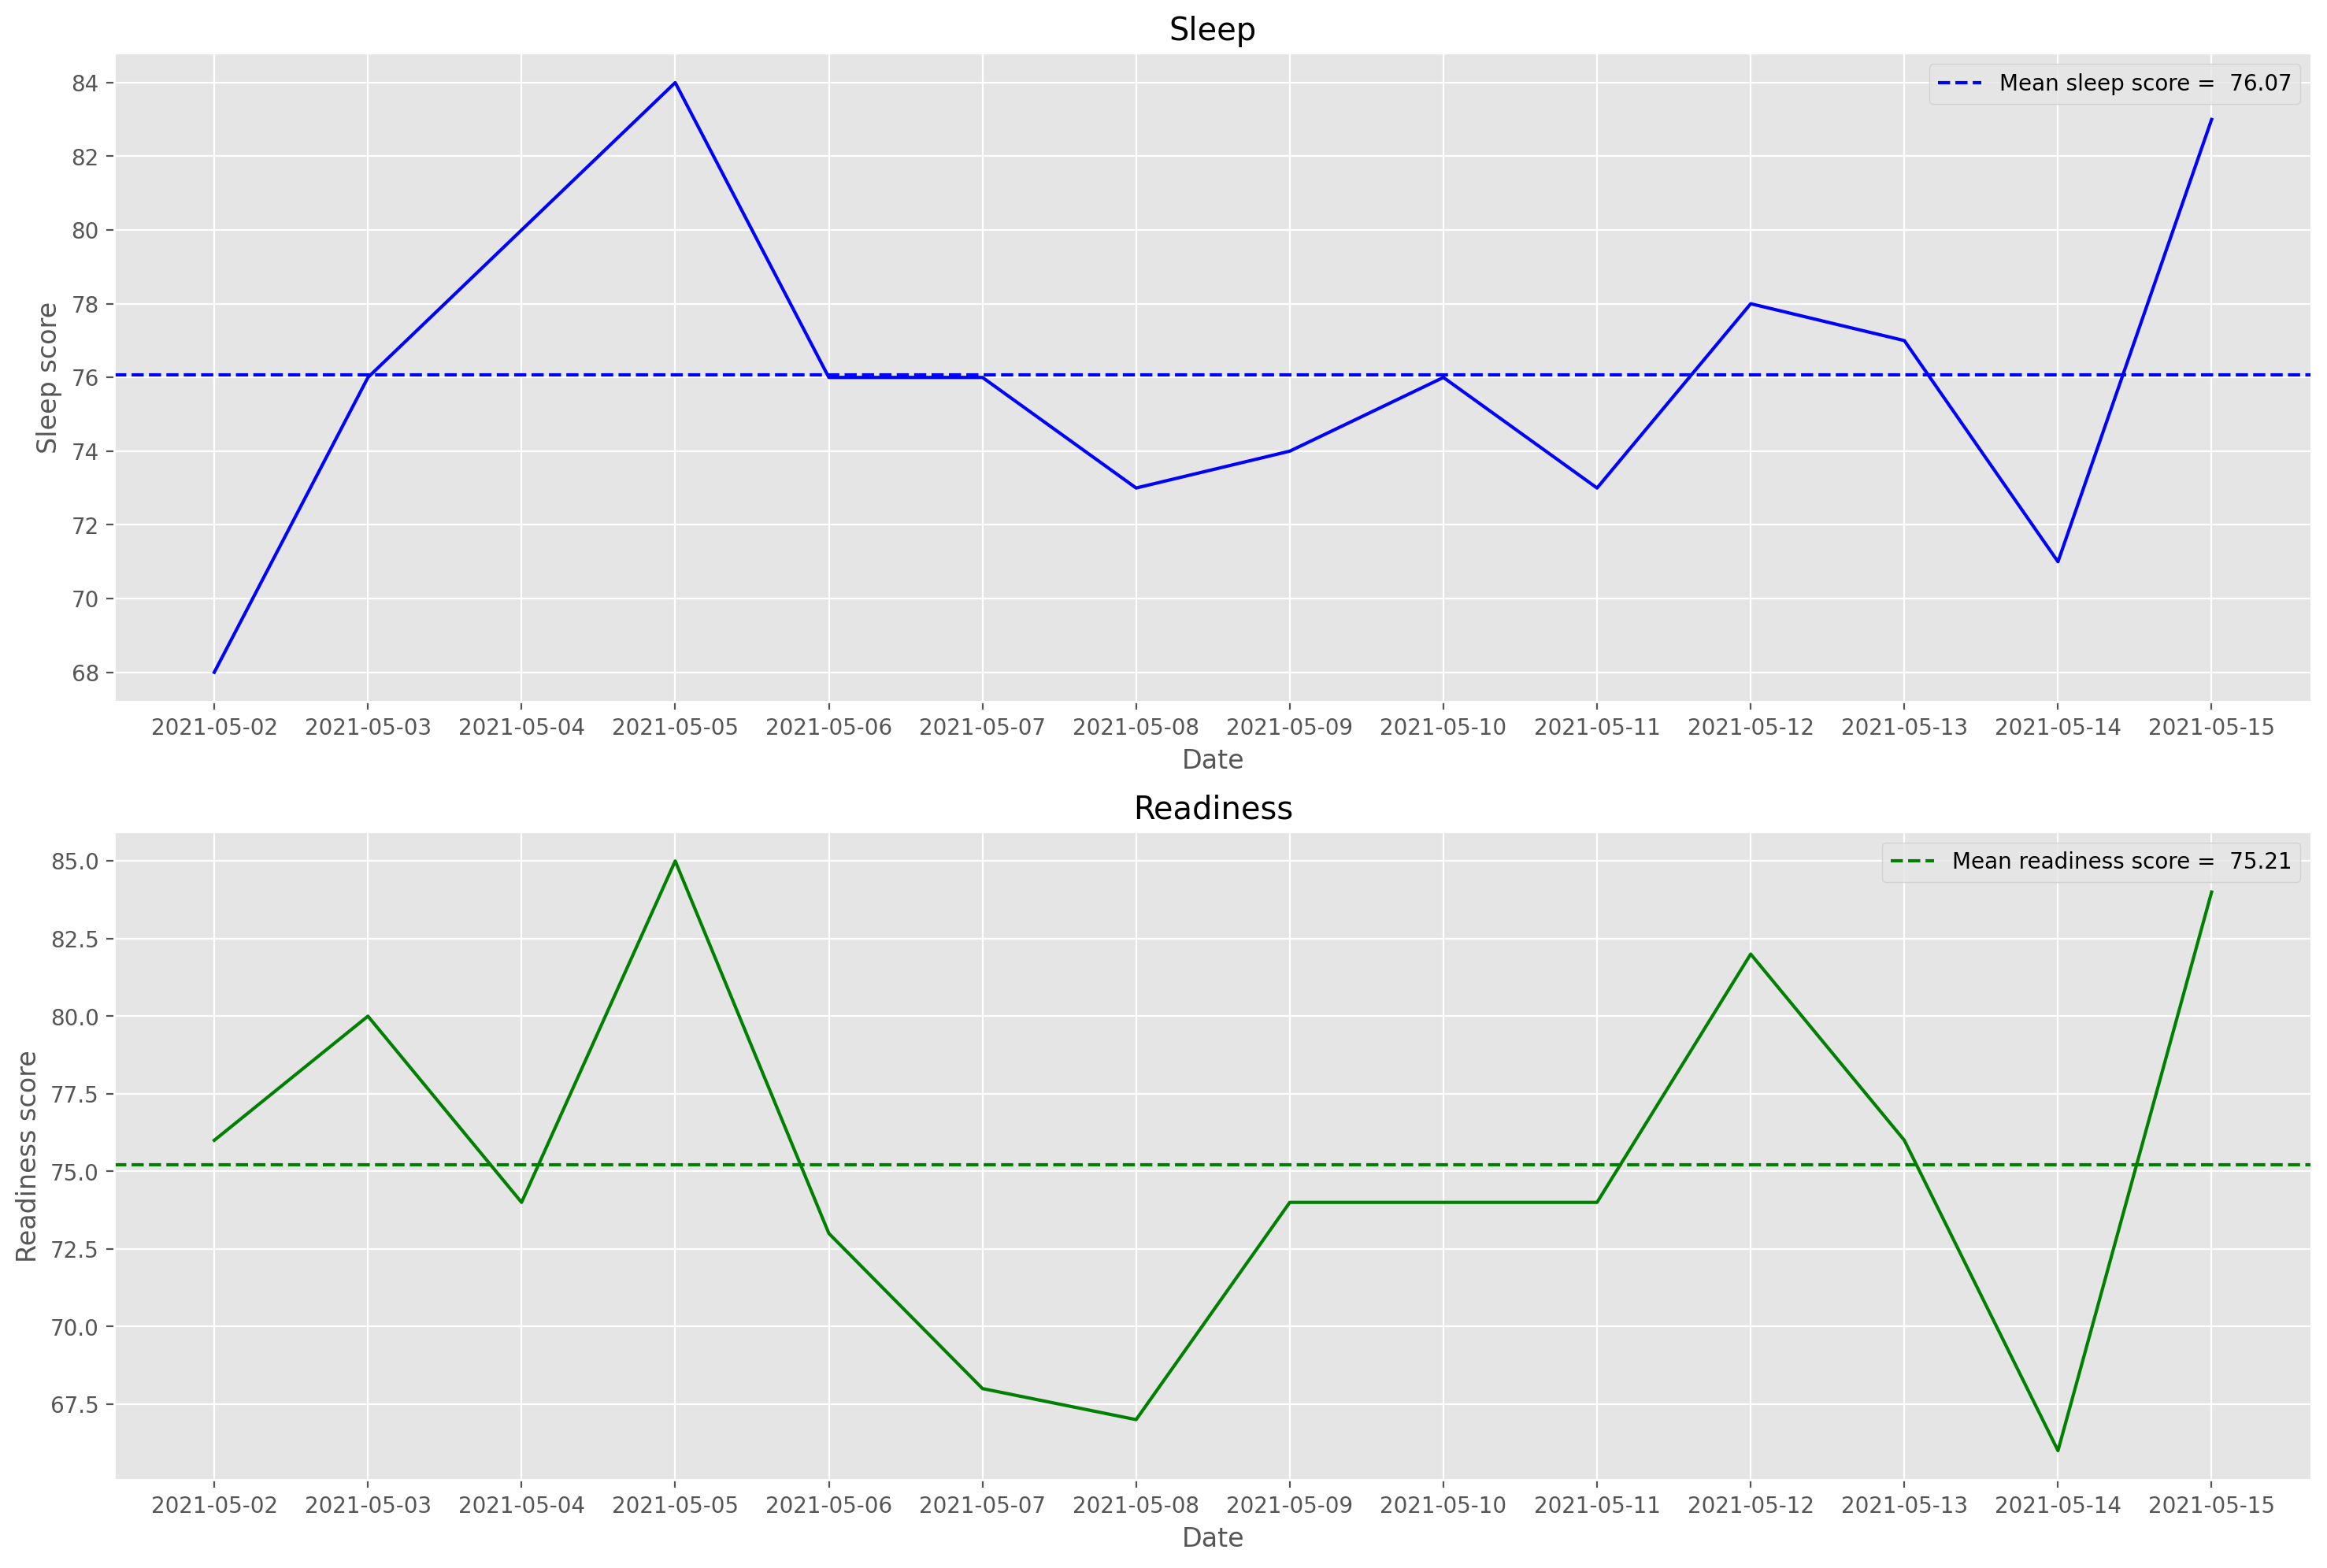

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12), dpi=200)

# sleep

ax[0].plot(dates, sleep_score, color='blue')

mean_sleep_score = sleep_score.mean()
ax[0].axhline(mean_sleep_score, label=f'Mean sleep score = {mean_sleep_score: 1.2f}',
           ls='dashed', color='blue')

ax[0].set_xlabel('Date')
ax[0].set_ylabel('Sleep score')
ax[0].set_title('Sleep')
ax[0].legend()

# readiness

mean_readiness_score = readiness_score.mean()

ax[1].plot(dates, readiness_score, color='green')
ax[1].axhline(mean_readiness_score, label=f'Mean readiness score = {mean_readiness_score: 1.2f}',
              ls='dashed', color='green')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Readiness score')
ax[1].set_title('Readiness')
ax[1].legend()